<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:27%; left:10%;">
     INE Bootcamp
</h1>
<h2 style="color: white; position: absolute; top:36%; left:10%;">
    Data Analysis, Visualization and Predictive Modeling
</h2> 

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:58%; left:10%;">
    <b>David Mertz, Ph.D.</b>
</h3>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:63%; left:10%;">
    <b>Data Scientist</b>
</h3>
</div>

<div style="width: 100%; height: 200px; background-color: #222; text-align: center; padding-top: 20px; margin-bottom: 40px;">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Seaborn statistical plots (Solutions)
</h1>

<br><br> 
</div>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<div style="width: 100%; height: 200px; background-color: #ef7d22; text-align: center; padding-top: 20px; margin-bottom: 40px;">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Exercises
</h1>

<br><br> 
</div>

<h2 style="font-weight: bold;">
    Titanic Survivors
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


These exercises can be performed with either Pandas `.plot()` or Seaborn methods.

In [2]:
titanic = pd.read_csv('data/titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


<h2 style="font-weight: bold;">
    EX1: age distributions
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


Plot the distribution of the ages of all passengers and visually determine the mode.

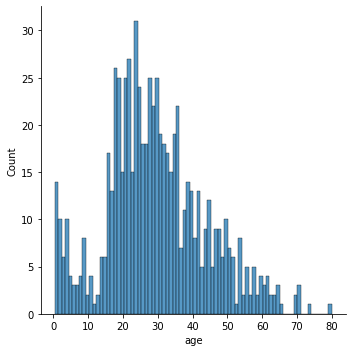

In [4]:
sns.displot(titanic.age.dropna(), bins=int(titanic.age.max()));

<h2 style="font-weight: bold;">
    EX2: Survived
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


Group the ages by survival and show a box plot.

---
### Seaborn

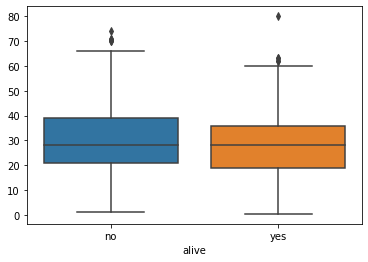

In [5]:
sns.boxplot(y=np.array(titanic.age), x=titanic.alive);

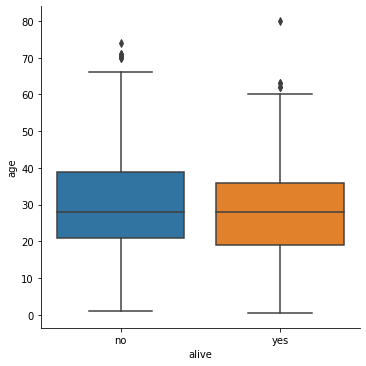

In [6]:
sns.catplot(y='age', x='alive', kind='box', data=titanic);

---
### Pandas

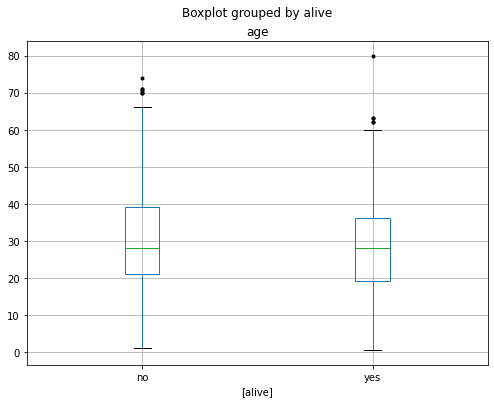

In [7]:
titanic[['age','alive']].boxplot(by='alive', sym='k.', figsize=(8, 6));

<h2 style="font-weight: bold;">
    EX3: Plot CDF
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


Plot the cumulative distribution functions of the ages of the passengers by survival.

*Is age a reasonable determining factor for survival?*

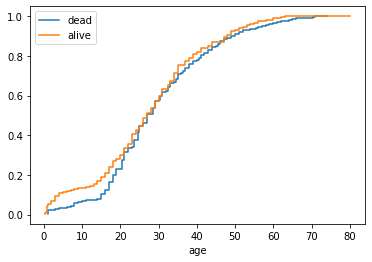

In [8]:
cdf = titanic.groupby('alive')['age'].value_counts(normalize=True)
ax = cdf['no'].sort_index().cumsum().plot(drawstyle='steps', label='dead', legend=True)
cdf['yes'].sort_index().cumsum().plot(drawstyle='steps', label='alive', legend=True);

<h2 style="font-weight: bold;">
    Tips
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

In [9]:
tips = pd.read_csv('data/tips.csv')

In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<h2 style="font-weight: bold;">
    EX1: tip fraction
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

1. compute the tip fraction
2. Plot the tip fraction against the total bill with a regression
  1. Is the rate of tipping per the size of the total bill constant?
  2. Does smoking, sex, or time matter?

In [11]:
tips['tip_frac'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.sort_values('tip_frac').tail()

,total_bill,tip,sex,smoker,day,time,size,tip_frac
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.389922
232,11.61,3.39,Male,No,Sat,Dinner,2,0.412409
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381


In [12]:
# a 250% and a 70% tip are very strange
tips = tips.sort_values('tip_frac')[:-2]

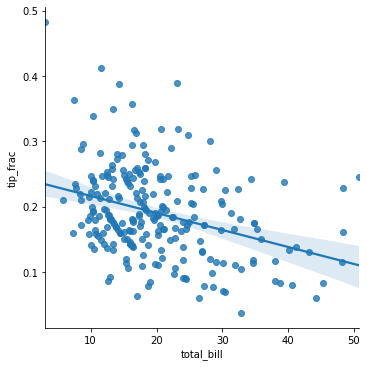

In [13]:
sns.lmplot(x='total_bill', y='tip_frac', data=tips);

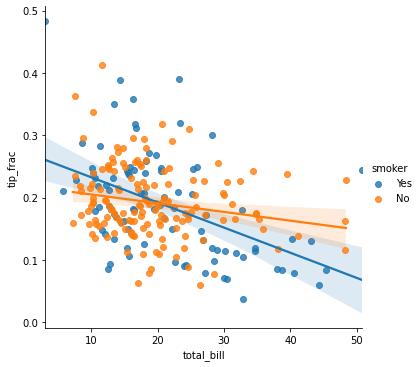

In [14]:
sns.lmplot(x='total_bill', y='tip_frac', hue='smoker', data=tips)

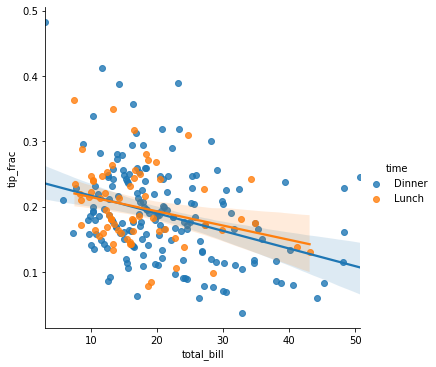

In [15]:
sns.lmplot(x='total_bill', y='tip_frac', hue='time', data=tips)

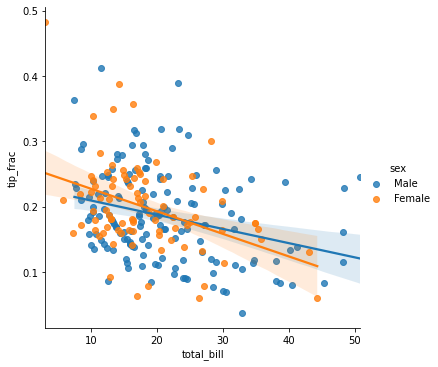

In [16]:
sns.lmplot(x='total_bill', y='tip_frac', hue='sex', data=tips);

---
<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    David Mertz, Ph.D.
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    david.mertz@gmail.com
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/dmertz/
</p>

</div>

<br><br><br>